**PARTE 1: Análisis descriptivo y preprocesamiento de los datos:**

1.- Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).

**Introducción**

El problema de rotación de personal se refiere a la tasa o porcentaje de empleados que abandonan una organización en un período de tiempo determinado. Este problema es muy comun en las empresas por diversos factores que buscamos entender por medio de este conjunto de datos. Exploraremos los tipos de trabajos, area de especialicazion, educacion entre otros factores.

2.- Carga la base de datos y realiza los análisis necesarios para responder a las siguientes preguntas:

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/IAy_AA/"
os.chdir(DIR)

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder , OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
hr_attrition_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [179]:
hr_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

a)

*   ¿Cuántas y cuáles de las variables son numéricas?
*   ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
*   ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?
*   De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden
anular del problema? Justifica tu respuesta.






In [180]:
# Identificar variables numéricas
numeric_variables = hr_attrition_df.select_dtypes(include=['int64', 'float64'])

# Identificar variables numéricas enteras
integer_variables = hr_attrition_df.select_dtypes(include='int64')

# Identificar variables numéricas de valor real (flotante)
float_variables = hr_attrition_df.select_dtypes(include='float64')

# Imprimir resultados
print(f'Variables Numéricas: {numeric_variables.columns}')
print('')
print(f'Variables Numéricas Enteras: {integer_variables.columns}')
print('')
print(f'Variables Numéricas de Valor Real (Flotante): {float_variables.columns}')

Variables Numéricas: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Variables Numéricas Enteras: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLe

In [181]:
#convertir valores a numericos
hr_attrition_df_corr = hr_attrition_df.copy()
hr_attrition_df_corr['attrition_numeric'] = hr_attrition_df_corr['Attrition'].map({'Yes': 1, 'No': 0})

#Correlacion
correlation_matrix = hr_attrition_df_corr.corr()
correlation_with_attrition = correlation_matrix['attrition_numeric'].sort_values(ascending=True)
correlation_with_attrition

<ipython-input-181-f6639c0409f7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hr_attrition_df_corr.corr()


TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
attrition_numeric           1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [182]:
print(f'Podemos eliminar las variables EmployeeCount y StandardHours ya que no tienen relacion con la variable principal')

Podemos eliminar las variables EmployeeCount y StandardHours ya que no tienen relacion con la variable principal


b)
*   ¿Cuántas y cuáles de las variables son categóricas?
*   ¿Cuántas y cuáles de estas variables son binarias?
*   ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
niveles que tiene cada una de estas variables.
*   ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles
que tiene cada una de estas variables.
*   De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden
anular del problema? Justifica tu respuesta.


In [183]:
# Identificar variables categóricas
categorical_variables = hr_attrition_df.select_dtypes(include='object')

# Identificar variables categóricas binarias
binary_categorical_variables = [var for var in categorical_variables.columns if len(hr_attrition_df[var].unique()) == 2]
binary_categorical_variables.append('Over18')

# Identificar variables categóricas
non_binary_categorical_variables = [var for var in categorical_variables.columns if var not in binary_categorical_variables]

#identificar variables nominales y ordinales
nominal_categorical_variables = ['Department','JobRole','MaritalStatus']
ordinal_categorical_variables = ['BusinessTravel','EducationField']


# Imprimir resultados
print(f'Variables Categóricas: {categorical_variables.columns}')
print('')
print(f'Variables Categóricas Binarias: {binary_categorical_variables}')
print('')
print(f'Variables Categóricas ordinales y nominales : {non_binary_categorical_variables}')
print('')
nominal_categorical_variables = [var for var in categorical_variables.columns if var in nominal_categorical_variables]
nominal_levels = {var: len(hr_attrition_df[var].unique()) for var in nominal_categorical_variables}
print(f'Variables nominales con sus niveles : {nominal_levels}')
print('')
ordinal_categorical_variables = [var for var in categorical_variables.columns if var in ordinal_categorical_variables]
ordinal_levels = {var: len(hr_attrition_df[var].unique()) for var in ordinal_categorical_variables}
print(f'Variables nominales con sus niveles : {ordinal_levels}')


Variables Categóricas: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Variables Categóricas Binarias: ['Attrition', 'Gender', 'OverTime', 'Over18']

Variables Categóricas ordinales y nominales : ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

Variables nominales con sus niveles : {'Department': 3, 'JobRole': 9, 'MaritalStatus': 3}

Variables nominales con sus niveles : {'BusinessTravel': 3, 'EducationField': 6}


c)
*   En esta base de datos y con base a la información dada, ¿existe alguna o algunas
variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?


In [184]:
print(f'Yo considero que si, por ejemplo el genero se podria considerar una variable binaria, hombre y mujer, pero dependiendo del analista podria considerar diferentes generos como por ejemplo, hombre, mujer, nobinario, transexual, etc. el cual podrian impactar el resultado de nuestro modelo')

Yo considero que si, por ejemplo el genero se podria considerar una variable binaria, hombre y mujer, pero dependiendo del analista podria considerar diferentes generos como por ejemplo, hombre, mujer, nobinario, transexual, etc. el cual podrian impactar el resultado de nuestro modelo


d)
*   De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.


In [185]:
#Eliminar columnas
columnas_a_eliminar = ['EmployeeCount','StandardHours']
hr_attrition_df = hr_attrition_df.drop(columnas_a_eliminar, axis=1)

# Mostrar el DataFrame resultante
hr_attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


3.- Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y
15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para
los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve
la estratificación de las clases de la variable “Attrition”.


In [186]:
from sklearn.model_selection import train_test_split

X = hr_attrition_df.drop('Attrition', axis=1)
y = hr_attrition_df['Attrition']

# Realizar la partición estratificada
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Dividir el conjunto temporal en conjuntos de validación y prueba (mitad y mitad)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

a)
*   Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y
Prueba.


In [187]:
# Mostrar las formas (shapes) de los conjuntos resultantes
print("Train shapes:", X_train.shape, y_train.shape,)
print("Validation shapes:", X_val.shape, y_val.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (1029, 32) (1029,)
Validation shapes: (220, 32) (220,)
Test shapes: (221, 32) (221,)


4.-Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables
numéricas.


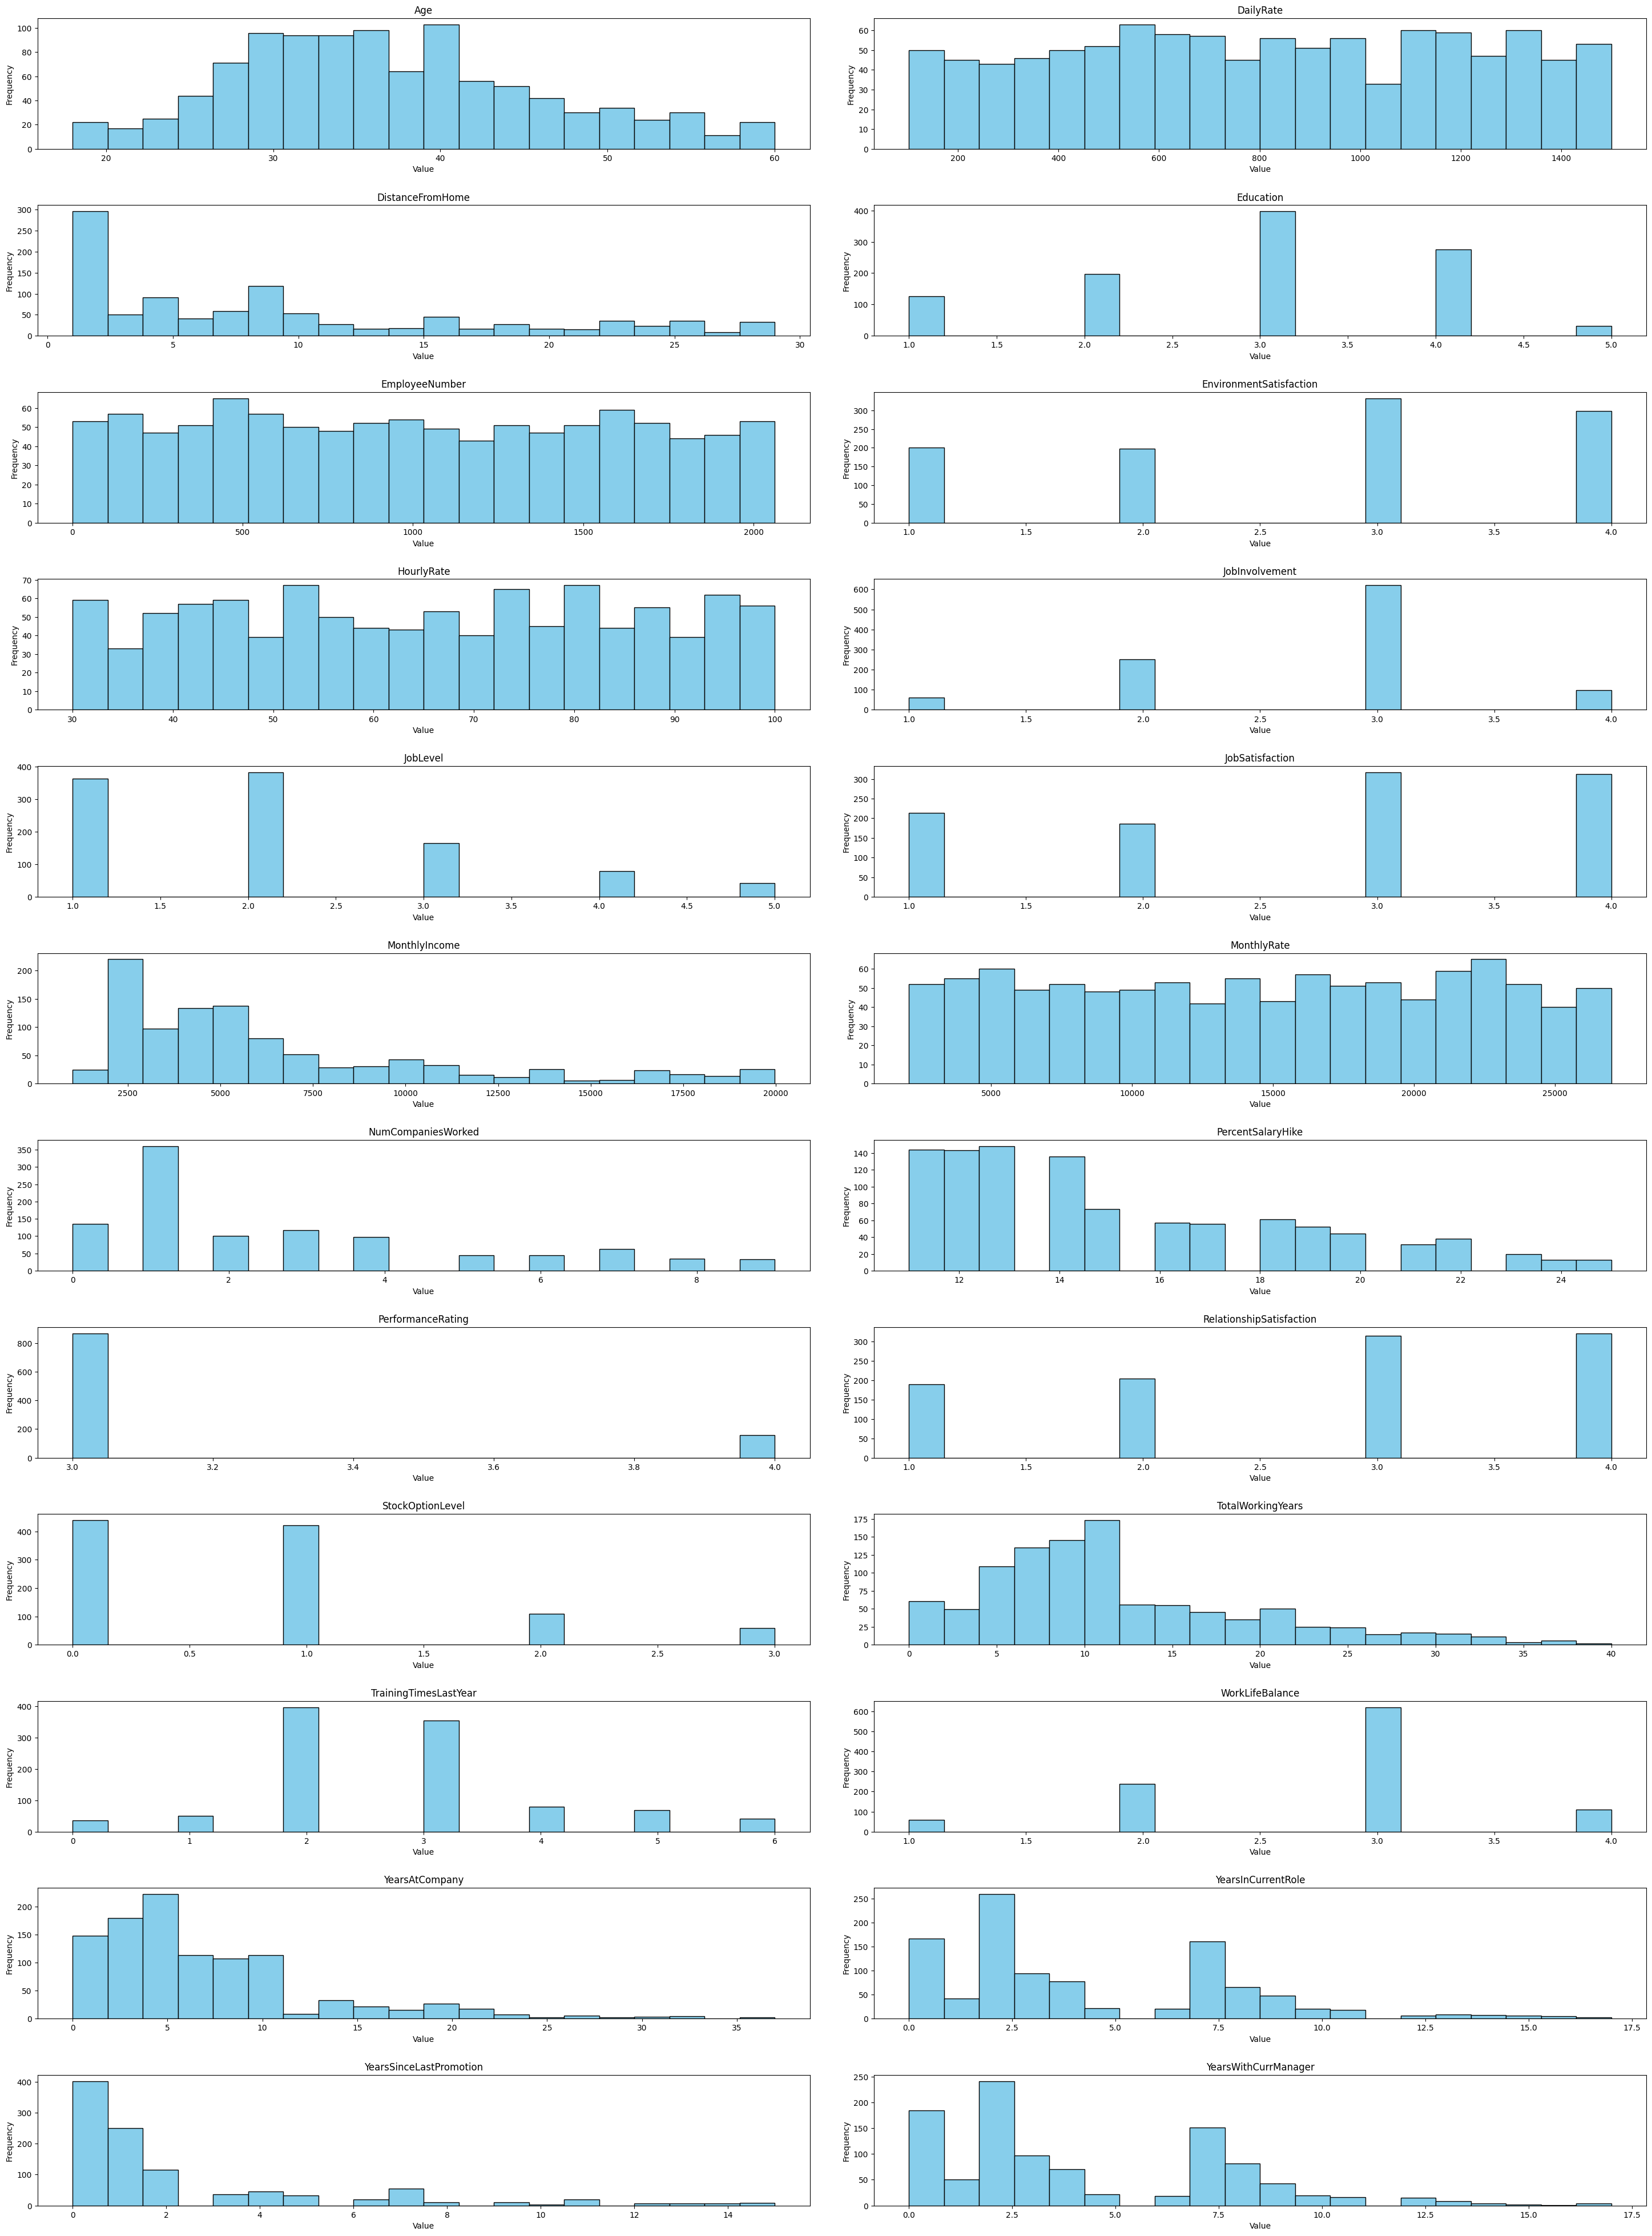

In [188]:

numeric_variables = X_train.select_dtypes(include='number')

fig, axes = plt.subplots(nrows=len(numeric_variables.columns) // 2, ncols=2, figsize=(30, 40))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_variables.columns):
    row, col = i // 2, i % 2
    axes[row, col].hist(X_train[column], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.show()


a)
*   Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en
dichas variables?
*   Aplica las transformaciones que hayas determinado realizar, evitando el
filtrado de información (data-leakage). A estas nuevas variables
transformadas llamarlas XtrainT, XvalT y XtestT.

In [189]:
print('Se pueden identificar valores mayores al rango de 0-1 por lo tanto se aplicara una transformacion de escalamiento, utilizaremos la transformacion de z-score')
print('Tambien se le aplicara un transformacion a los datos para que su distribucion sea mas simetrica')
print('Y a los valores categoricos se les realizara una transformacion de codificacion')

Se pueden identificar valores mayores al rango de 0-1 por lo tanto se aplicara una transformacion de escalamiento, utilizaremos la transformacion de z-score
Tambien se le aplicara un transformacion a los datos para que su distribucion sea mas simetrica
Y a los valores categoricos se les realizara una transformacion de codificacion


In [190]:
from sklearn.preprocessing import PowerTransformer

# Inicializa el transformador Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
numeric_variables = X_train.select_dtypes(include=['int64', 'float64'])
for var in numeric_variables:
    X_train[[var]] = transformer.fit_transform(X_train[[var]])
    X_val[[var]] = transformer.transform(X_val[[var]])
    X_test[[var]] = transformer.transform(X_test[[var]])

In [191]:
from sklearn.preprocessing import StandardScaler

# Inicializa el transformador Yeo-Johnson
scaler = StandardScaler()
for var in numeric_variables:
    X_train[[var]] = scaler.fit_transform(X_train[[var]])
    X_val[[var]] = scaler.transform(X_val[[var]])
    X_test[[var]] = scaler.transform(X_test[[var]])

5.-Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias,
evitando el filtrado de información.

In [192]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_variables = X_train.select_dtypes(include='object').columns

for var in categorical_variables:
    X_train[var] = label_encoder.fit_transform(X_train[var])
    X_val[var] = label_encoder.transform(X_val[var])
    X_test[var] = label_encoder.transform(X_test[var])

In [193]:
X_trainT = X_train.copy()
X_valT = X_val.copy()
X_testT = X_test.copy()


a)
*   En particular, obtener la distribución de las clases de la variable de salida
“Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un
problema de datos no balanceados?


In [194]:
print('Si se puede ver que los datos no estan balanceados por eso aplicamos la tranformacion debox-cot para tener una distribucion mas balanceada')

Si se puede ver que los datos no estan balanceados por eso aplicamos la tranformacion debox-cot para tener una distribucion mas balanceada


6.- Realiza una inspección de las variables ordinales y determina qué transformaciones
aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.


In [195]:
#transformaciones
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
#identificar variables nominales y ordinales
ordinal_categorical_variables = ['BusinessTravel','EducationField']
for var in ordinal_categorical_variables:
    X_train[[var]] = encoder.fit_transform(X_train[[var]])
    X_val[[var]] = encoder.transform(X_val[[var]])
    X_test[[var]] = encoder.transform(X_test[[var]])

7 Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes
incluir la variable “Attrition”.


In [196]:

# Concatenar X_train y y_train
train_data = pd.concat([X_train, y_train], axis=1)

#convertir valores a numericos
train_data['attrition_numeric'] = train_data['Attrition'].map({'Yes': 1, 'No': 0})

#Correlacion
correlation_matrix = train_data.corr()
correlation_with_attrition = correlation_matrix['attrition_numeric'].sort_values(ascending=True)
correlation_with_attrition

<ipython-input-196-17f189fa5a95>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


TotalWorkingYears          -0.234477
YearsAtCompany             -0.220676
MonthlyIncome              -0.218410
YearsWithCurrManager       -0.211185
Age                        -0.201524
YearsInCurrentRole         -0.200589
JobLevel                   -0.187801
StockOptionLevel           -0.184527
JobInvolvement             -0.114748
EnvironmentSatisfaction    -0.107632
JobSatisfaction            -0.105733
YearsSinceLastPromotion    -0.073545
WorkLifeBalance            -0.070491
DailyRate                  -0.062438
RelationshipSatisfaction   -0.060546
TrainingTimesLastYear      -0.048750
HourlyRate                 -0.042494
Education                  -0.035624
PercentSalaryHike          -0.026890
PerformanceRating           0.002557
MonthlyRate                 0.018729
EmployeeNumber              0.028165
Gender                      0.035458
JobRole                     0.062030
NumCompaniesWorked          0.064763
Department                  0.074633
DistanceFromHome            0.078597
M

a)
*   Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres
dentro de la matriz.


In [197]:
correlation_with_attrition_df = pd.DataFrame(correlation_with_attrition)
corr_positiva= correlation_with_attrition_df.query('attrition_numeric > 0')
corr_positiva

,attrition_numeric
PerformanceRating,0.002557
MonthlyRate,0.018729
EmployeeNumber,0.028165
Gender,0.035458
JobRole,0.062030
NumCompaniesWorked,0.064763
Department,0.074633
DistanceFromHome,0.078597
MaritalStatus,0.158253
OverTime,0.216307


b)
*   Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres
dentro de la matriz.

In [198]:
corr_negativa= correlation_with_attrition_df.query('attrition_numeric < 0')
corr_negativa

,attrition_numeric
TotalWorkingYears,-0.234477
YearsAtCompany,-0.220676
MonthlyIncome,-0.218410
YearsWithCurrManager,-0.211185
Age,-0.201524
YearsInCurrentRole,-0.200589
JobLevel,-0.187801
StockOptionLevel,-0.184527
JobInvolvement,-0.114748
EnvironmentSatisfaction,-0.107632


8.- Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el
filtrado de información y usando el argumento “drop_first” para generar “k-1” variables
“dummies”, de las “k” que cada variable.


In [199]:
nominal_categorical_variables = ['Department','JobRole','MaritalStatus']
# Aplica la transformación get_dummies a las variables nominales
X_train = pd.get_dummies(X_train, columns=nominal_categorical_variables, drop_first=True)
X_val = pd.get_dummies(X_val, columns=nominal_categorical_variables, drop_first=True)
X_test = pd.get_dummies(X_test, columns=nominal_categorical_variables, drop_first=True)

9.- Usa la instrucción XtrainT.head().T, para desplegar los primeros registros de tus datos de
entrenamiento con todas las transformaciones realizadas hasta ahora.
NOTA: Hasta aquí, los nombres de tus variables deben seguir siendo los mismos: XtrainT,
XvalT, XtestT, ytrainT, yvalT, ytestT.



a)
*   Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.

In [200]:
X_trainT.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
853,-2.391887,2,-0.347553,1,0.348865,-0.892418,1,0.384716,0.226553,1,...,4.857226e-17,0.182557,-1.091279,-2.023489,1.018793,0.273666,-1.445727,-0.920176,-1.103143,-1.549324
435,-0.353325,2,1.141375,1,0.905166,-1.745796,3,-0.622562,-0.696247,1,...,-6.938894e-18,1.197420,-1.091279,0.652257,-0.556046,1.975866,0.323378,0.680377,1.456410,0.907359
587,1.527326,2,1.246078,1,0.563410,1.095098,1,-0.214118,1.233457,0,...,4.857226e-17,-0.734785,0.549654,-0.105623,0.269258,0.273666,-0.068153,-0.458391,0.087639,0.230119
1170,-1.124560,1,-0.487993,1,-1.028925,0.060530,3,1.025994,1.233457,1,...,-6.938894e-18,0.182557,-1.091279,-0.613636,-2.644319,-1.096718,-0.309430,-0.458391,0.087639,-0.417512
159,-0.235577,1,-1.300662,2,-1.028925,1.095098,2,-1.406515,0.226553,0,...,-6.938894e-18,1.197420,0.549654,-0.613636,0.269258,0.273666,-0.309430,-0.099711,0.087639,-0.417512


In [201]:
X_testT.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1280,0.102235,2,1.057825,0,0.225601,-0.892418,4,1.219230,0.226553,1,...,-6.938894e-18,0.182557,-1.091279,1.051162,1.018793,-1.096718,0.772732,-1.604469,1.103333,0.907359
1212,-0.235577,2,-0.263101,1,1.173000,0.060530,1,1.096749,-0.696247,0,...,-6.938894e-18,-0.734785,-1.091279,0.039567,0.269258,0.273666,0.772732,1.240639,1.531487,0.907359
1226,-0.473875,1,-0.503781,1,0.460823,0.060530,1,1.121942,-1.517060,1,...,-6.938894e-18,-1.535783,0.549654,0.039567,0.269258,-1.096718,-0.068153,-0.458391,0.087639,-0.063441
1379,-1.124560,1,1.272113,0,1.341987,0.060530,0,1.412605,-1.517060,0,...,-6.938894e-18,-1.535783,-1.091279,-2.023489,-0.556046,0.273666,-1.445727,-1.604469,-1.103143,-1.549324
684,0.419366,2,-0.314165,2,0.460823,1.095098,2,0.016762,-1.517060,1,...,-6.938894e-18,-0.734785,0.549654,0.175781,-0.556046,-1.096718,-1.445727,-1.604469,-1.103143,-1.549324


In [202]:
X_valT.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
972,-2.577667,0,0.801173,1,-1.478052,0.060530,1,0.639277,1.233457,0,...,-6.938894e-18,0.182557,-1.091279,-2.604063,1.713000,1.975866,-2.226537,-1.604469,-1.103143,-1.549324
132,-0.597379,2,-0.618074,2,1.231884,0.060530,1,-1.515031,-0.696247,0,...,-6.938894e-18,0.182557,0.549654,-1.045618,-0.556046,0.273666,-0.958175,-0.458391,0.600513,-0.417512
1355,-0.007923,2,-1.203386,2,1.046238,-0.892418,2,1.366642,0.226553,1,...,-6.938894e-18,0.182557,1.320686,0.304259,-1.495666,-2.121636,-0.309430,-0.458391,0.087639,-0.063441
665,1.092881,2,1.523150,2,-1.028925,1.095098,1,-0.029783,1.233457,0,...,-6.938894e-18,-1.535783,-1.091279,-1.309018,0.269258,-1.096718,-0.597684,-0.458391,0.087639,-0.417512
1468,1.270810,1,0.570606,2,-1.028925,0.060530,3,1.565143,1.233457,1,...,-6.938894e-18,1.197420,-1.091279,0.859491,0.269258,-1.096718,0.636452,0.680377,-1.103143,1.090510


**PARTE 2: Análisis exploratorio entre factores**

10.- Se pueden analizar una buena cantidad de factores para buscar relaciones entre los
factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de
ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar
información al problema que enfrentamos.


In [203]:
df_visualization = hr_attrition_df.copy()

a)
*   Las variables “Age” y “Attrition”.


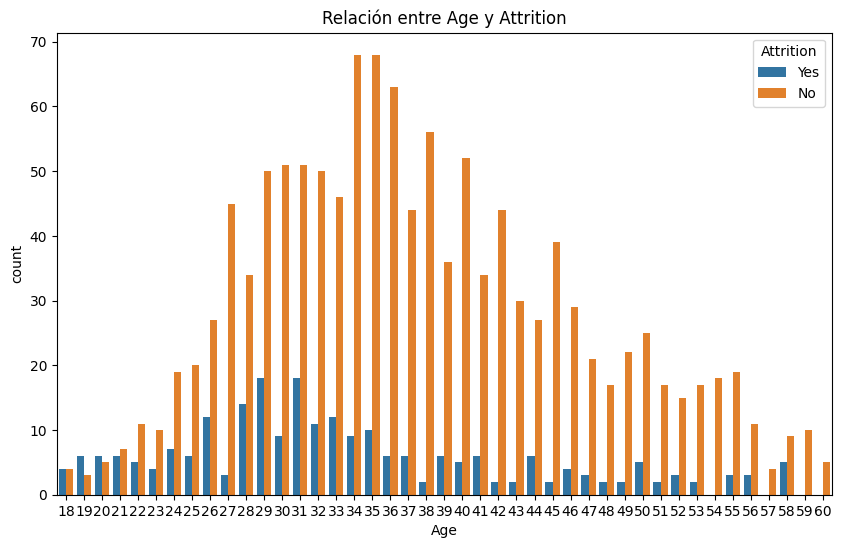

In [204]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Attrition', data=df_visualization)
plt.title('Relación entre Age y Attrition')
plt.show()

b)
*   Las variables “Department” y “Attrition”.


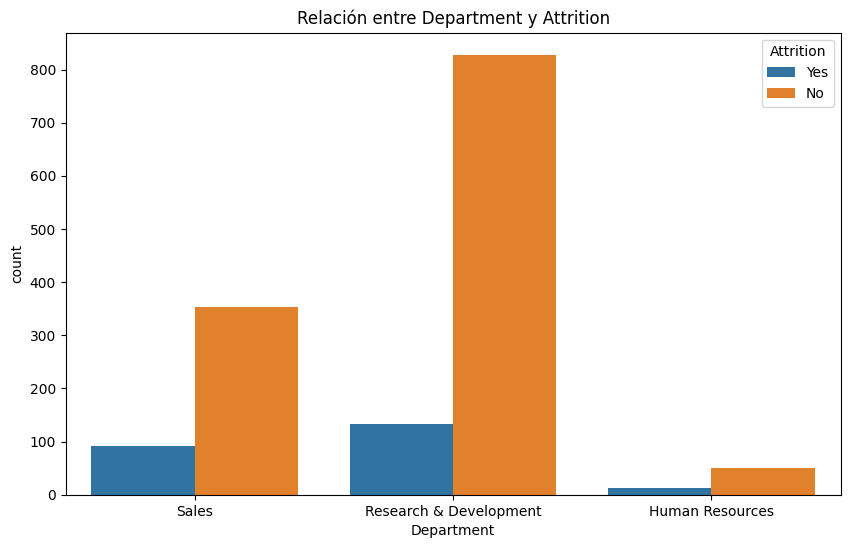

In [205]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df_visualization)
plt.title('Relación entre Department y Attrition')
plt.show()

c)
*   Las variables “Gender” y “Attrition”.


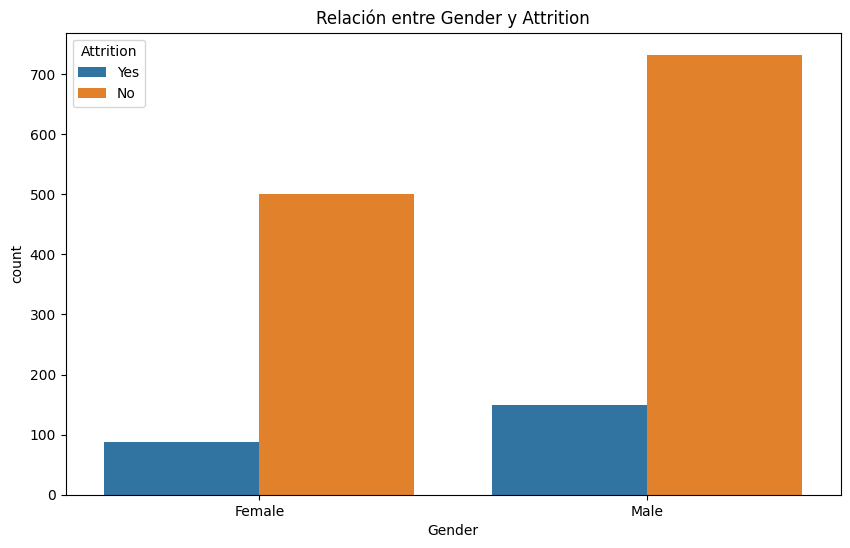

In [206]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df_visualization)
plt.title('Relación entre Gender y Attrition')
plt.show()

d)
*   Incluye alguna otra relación o relaciones que consideres relevantes.


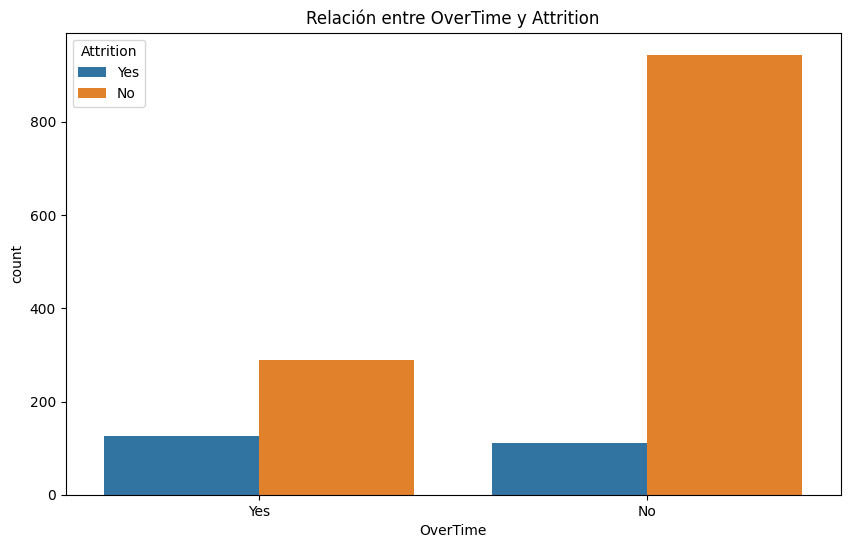

In [207]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df_visualization)
plt.title('Relación entre OverTime y Attrition')
plt.show()

e)
*   Con base a los gráficos obtenidos incluye tus conclusiones al respecto.
NOTA: Puedes seleccionar el tipo de gráfico que consideres más adecuado. En particular te
puedes apoyar en la librearía de seaborn. A manera de ejemplo puedes ver:
https://seaborn.pydata.org/generated/seaborn.countplot.html

**PARTE 3: Modelado**

11.- Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no
sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.



In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear y ajustar el modelo de regresión logística
logreg_model = LogisticRegression(random_state=42)

# Entrenar el modelo
logreg_model.fit(X_trainT, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg_model.predict(X_testT)

a)
*   Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.


In [209]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy}')

Accuracy en el conjunto de prueba: 0.8642533936651584


b)
*   Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.


In [210]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report en el conjunto de prueba:\n', classification_rep)


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

          No       0.89      0.96      0.92       185
         Yes       0.64      0.39      0.48        36

    accuracy                           0.86       221
   macro avg       0.76      0.67      0.70       221
weighted avg       0.85      0.86      0.85       221



c)
*   Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.


In [211]:
print('Para la precision y el recall tenemos en la clasificacion de Yes, tenemos numero muy bajos .64 y .39 aunque la exactitud general es de un .84 yo creo que esta sobreentrenado')
print('Creo que el modelo puede tener un mejor entrenamiento para un mejor indice de accuracy ')

Para la precision y el recall tenemos en la clasificacion de Yes, tenemos numero muy bajos .64 y .39 aunque la exactitud general es de un .84 yo creo que esta sobreentrenado
Creo que el modelo puede tener un mejor entrenamiento para un mejor indice de accuracy 


d)
*   ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.


In [212]:
print('Yo considero que si, ya que tenemos 185 valores en No y solo 36 valores en Yes esto puede ocacionar un desbalanceo de clases')

Yo considero que si, ya que tenemos 185 valores en No y solo 36 valores en Yes esto puede ocacionar un desbalanceo de clases


e)
*   Interpreta el valor numérico de la “precision” de la clase positiva.


In [213]:
print('Observo que la precisión para la clase "Yes" es 0.64, esto significa que del total de instancias que el modelo predijo como Yes,')
print('el 64% correspondía a casos reales de atrición, y el 36% eran falsos positivos ')

Observo que la precisión para la clase "Yes" es 0.64, esto significa que del total de instancias que el modelo predijo como Yes,
el 64% correspondía a casos reales de atrición, y el 36% eran falsos positivos 


f)
*   Interpreta el valor numérico del “recall” de la clase positiva.


In [214]:
print('Observo que el recall para la clase "Yes" es 0.39. Esto significa que el modelo identificó correctamente el 39% de todas las instancias reales de atrición. ')
print('el 61% restante corresponde a instancias de atrición que fueron clasificadas como no atrición (falsos negativos)')

Observo que el recall para la clase "Yes" es 0.39. Esto significa que el modelo identificó correctamente el 39% de todas las instancias reales de atrición. 
el 61% restante corresponde a instancias de atrición que fueron clasificadas como no atrición (falsos negativos)


g)
*   Con base al contexto de este problema, de rotación de personal, ¿cuál de las
métricas, “precision” o “recall” consideras que es más importante disminuir su
valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y
debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano
a cero? Justifica tu respuesta con base al contexto del problema.

In [215]:
print('considero que  la métrica de "recall" podría considerarse más importante que la "precision"')
print('creo que el no detectar adecuadamente que un empleado que está en riesgo de dejar la organización podría ser significativamente alto')
print('y la organización podría perder la oportunidad de implementar medidas preventivas, retener talento valioso y mitigar la rotación de personal')

considero que  la métrica de "recall" podría considerarse más importante que la "precision"
creo que el no detectar adecuadamente que un empleado que está en riesgo de dejar la organización podría ser significativamente alto
y la organización podría perder la oportunidad de implementar medidas preventivas, retener talento valioso y mitigar la rotación de personal


12.- Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no
sobreentrenado de los vecinos más cercanos kNN, usando la función
KNeighborsClassifier() de sklearn.



In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear y ajustar el modelo kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_trainT, y_train)


y_pred = knn_model.predict(X_valT)

a)
*   Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.


In [217]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validación: {accuracy}')

Accuracy en el conjunto de validación: 0.8318181818181818


b)
*   Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.


In [218]:

classification_rep = classification_report(y_val, y_pred)
print('Classification Report en el conjunto de validación:')
print(classification_rep)

Classification Report en el conjunto de validación:
              precision    recall  f1-score   support

          No       0.85      0.97      0.91       185
         Yes       0.38      0.09      0.14        35

    accuracy                           0.83       220
   macro avg       0.61      0.53      0.52       220
weighted avg       0.77      0.83      0.78       220



c)
*   Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.


In [219]:
print('considero que el modelo esta sobreentrenado, el modelo parece estar capturando bien los patrones en la clase NO, pero tiene dificultades para predecir adecuadamente a la clase minoritaria Yes.')

considero que el modelo esta sobreentrenado, el modelo parece estar capturando bien los patrones en la clase NO, pero tiene dificultades para predecir adecuadamente a la clase minoritaria Yes.


d)
*   Interpreta el valor numérico de la “precision” de la clase positiva.


In [220]:
 print('la precisión es 0.38 significa que el 38% de las prediciones de "Yes" por el modelo son verdaderamente casos positivos, mientras que el 62% son falsos positivos')

la precisión es 0.38 significa que el 38% de las prediciones de "Yes" por el modelo son verdaderamente casos positivos, mientras que el 62% son falsos positivos


e)
*   Interpreta el valor numérico del “recall” de la clase positiva.


In [221]:
 print('el "recall" es 0.09 significa que solo el 9% de todos los casos positivos reales fueron identificados correctamente por el modelo, mientras que el 91% de los casos positivos reales fueron clasificados incorrectamente como negativos.')

el "recall" es 0.09 significa que solo el 9% de todos los casos positivos reales fueron identificados correctamente por el modelo, mientras que el 91% de los casos positivos reales fueron clasificados incorrectamente como negativos.


f)
*   Compara los resultados con los del modelo de Regresión Logística y escribe tus
conclusiones.

In [222]:
print('En genera la regresion logistica tiene mejores indicadores en comparacion a KNN, aunque en accuarency tienen un porcentaje similar podemos ver una gran diferencia')
print('en el recall y la precision por mas de un 30% de diferencia ')

En genera la regresion logistica tiene mejores indicadores en comparacion a KNN, aunque en accuarency tienen un porcentaje similar podemos ver una gran diferencia
en el recall y la precision por mas de un 30% de diferencia 


**PARTE 4: Balanceo de Clases**

13.- Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los
valores de los hiperparámetros que consideres más adecuados para obtener un modelo
no sobreentrenado.



In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logreg_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model_weighted.fit(X_trainT, y_train)

y_pred_weighted = logreg_model_weighted.predict(X_valT)



a)
*   Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.

In [224]:
accuracy_weighted = accuracy_score(y_val, y_pred_weighted)
print(f'Accuracy en el conjunto de validación con pesos de clase: {accuracy_weighted}')



Accuracy en el conjunto de validación con pesos de clase: 0.7727272727272727



b)
*   Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.

In [225]:
classification_rep_weighted = classification_report(y_val, y_pred_weighted)
print('Classification Report en el conjunto de validación con pesos de clase:')
print(classification_rep_weighted)

Classification Report en el conjunto de validación con pesos de clase:
              precision    recall  f1-score   support

          No       0.94      0.78      0.85       185
         Yes       0.39      0.74      0.51        35

    accuracy                           0.77       220
   macro avg       0.66      0.76      0.68       220
weighted avg       0.85      0.77      0.80       220




c)
*   Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [226]:
print('el uso del argumento class_weight ha mejorado el balance en la clasificación de ambas clases en comparación con el modelo sin este ajuste')
print('el cambio mas notable es en el recall de tener un porcentaje de un maximo 39% a un 74%')

el uso del argumento class_weight ha mejorado el balance en la clasificación de ambas clases en comparación con el modelo sin este ajuste
el cambio mas notable es en el recall de tener un porcentaje de un maximo 39% a un 74%



14.- Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los
hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.

In [227]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [228]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainT, y_train)

logreg_model_smote = LogisticRegression(random_state=42)
logreg_model_smote.fit(X_train_resampled, y_train_resampled)

y_pred_smote = logreg_model_smote.predict(X_valT)



a)
*   Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.

In [229]:
accuracy_smote = accuracy_score(y_val, y_pred_smote)
print(f'Accuracy en el conjunto de validación con SMOTE: {accuracy_smote}')

Accuracy en el conjunto de validación con SMOTE: 0.7136363636363636



b)
*   Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.

In [230]:
classification_rep_smote = classification_report(y_val, y_pred_smote)
print('Classification Report en el conjunto de validación con SMOTE:')
print(classification_rep_smote)

Classification Report en el conjunto de validación con SMOTE:
              precision    recall  f1-score   support

          No       0.90      0.74      0.81       185
         Yes       0.29      0.57      0.39        35

    accuracy                           0.71       220
   macro avg       0.60      0.66      0.60       220
weighted avg       0.80      0.71      0.75       220




c)
*   Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [231]:
print('En este tambien podemos ver un aumento significativo en el recall pero vemos afectacion en la presicion disminuyendo considerablemente')

En este tambien podemos ver un aumento significativo en el recall pero vemos afectacion en la presicion disminuyendo considerablemente



15.- Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los
resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye
tus conclusiones.
NOTA: https://imbalanced-learn.org/stable/references/combine.html

In [232]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, classification_report


smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X_trainT, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_smoteenn = model.predict(X_valT)

accuracy_smoteenn = accuracy_score(y_val, y_pred_smoteenn)
print(f'Accuracy en el conjunto de validación con SMOTE-ENN: {accuracy_smoteenn}')

classification_rep_smoteenn = classification_report(y_val, y_pred_smoteenn)
print('Classification Report en el conjunto de validación con SMOTE-ENN:')
print(classification_rep_smoteenn)

Accuracy en el conjunto de validación con SMOTE-ENN: 0.5409090909090909
Classification Report en el conjunto de validación con SMOTE-ENN:
              precision    recall  f1-score   support

          No       0.90      0.51      0.65       185
         Yes       0.21      0.69      0.32        35

    accuracy                           0.54       220
   macro avg       0.55      0.60      0.49       220
weighted avg       0.79      0.54      0.60       220



In [233]:
print('Podemos ver un resultado similar al uso de smote y usando el argumento class_weight, en el recall se puede observar una mejoria pero afectacion en la precision')

Podemos ver un resultado similar al uso de smote y usando el argumento class_weight, en el recall se puede observar una mejoria pero afectacion en la precision


**PARTE 5: La importancia de los factores**

16.- Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud
de los coeficientes como métrica para identificar aquellos factores que se consideran los
más importantes al problema de rotación de personal.



In [234]:
print('creo que es crítico identificar la mayor cantidad posible de casos positivos reales, para asegurarnos de capturar la mayoría de los empleados que realmente dejarán la organización')
print('para esto me enfocaria en el recall de la funcion ')

creo que es crítico identificar la mayor cantidad posible de casos positivos reales, para asegurarnos de capturar la mayoría de los empleados que realmente dejarán la organización
para esto me enfocaria en el recall de la funcion 


a)
*   Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor
asociado a cada barra (bin).


In [235]:
coeficients = logreg_model_weighted.coef_[0]
coeficients

array([-2.28040335e-01, -7.51733171e-03, -1.72943140e-01,  1.02581522e+00,
        2.98665014e-01,  3.28478140e-02, -3.96397997e-02,  5.89686748e-02,
       -4.13986460e-01,  3.51368977e-01, -1.32377536e-01, -2.63540240e-01,
        2.17606031e-01, -1.06533505e-01, -3.98341308e-01,  2.17202022e-01,
       -6.45048450e-01,  2.75100325e-02,  5.91002406e-01,  0.00000000e+00,
        1.55943669e+00, -1.25884895e-01,  7.86429336e-17, -3.49140010e-01,
       -3.91954282e-01, -5.49577800e-01, -1.69099537e-01, -1.28432264e-01,
        3.18590428e-01, -2.47867771e-01,  4.30912519e-01, -4.03901239e-01])

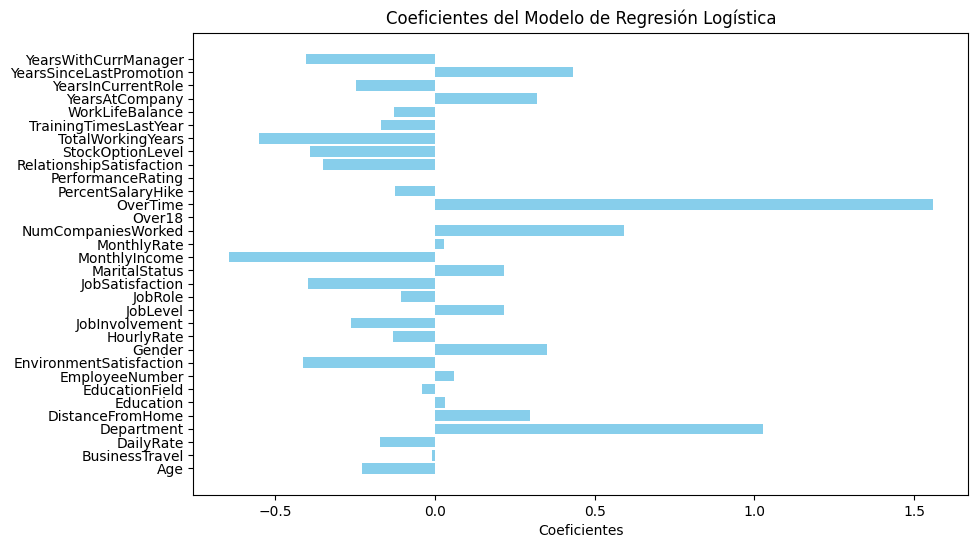

In [236]:
coeficients = logreg_model_weighted.coef_[0]
feature_names = X_trainT.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(coeficients)), coeficients, tick_label=feature_names, color='skyblue')
plt.xlabel('Coeficientes')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.show()

b)
*   ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?

In [237]:
print('Segun la grafica podemos observar que el overtime, el salario mensual, el ambiente laboral y los años desde la ultima promocion impactan de gran forma para que el empleado abandone su trabajo')

Segun la grafica podemos observar que el overtime, el salario mensual, el ambiente laboral y los años desde la ultima promocion impactan de gran forma para que el empleado abandone su trabajo



c)
*   ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?


In [238]:
print('Podemos observar en el grafico aspectos como la educacion, el rol, el genero entre otros')

Podemos observar en el grafico aspectos como la educacion, el rol, el genero entre otros


17.- Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el
kNN, aplica la técnica de permutación de los factores con el método
“permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento
“scoring” para identificar aquellos factores que se consideran los más importantes al
problema de rotación de personal.


In [239]:
#pip install --upgrade scikit-learn

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer, f1_score

# Crear y ajustar el modelo de regresión logística
logreg_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model_weighted.fit(X_trainT, y_train)

# Definir la métrica a evaluar (f1_weighted)
scorer = make_scorer(f1_score, average='weighted')

# Realizar permutación y obtener la importancia de los factores
_, perm_importance, _ = permutation_test_score(
    logreg_model_weighted, X_valT, y_val, scoring=scorer, n_permutations=100, random_state=42
)

# Obtener los resultados y factores más importantes
importance_means = np.mean(perm_importance, axis=0)  # Calcular la importancia media
important_factors = X_trainT.columns[np.argsort(importance_means)[::-1]]

# Imprimir resultados
print("Importancia media de los factores:")
print(importance_means)
print("\nFactores más importantes:")
print(important_factors)


Importancia media de los factores:
0.6398639249579816

Factores más importantes:
Index(['Age'], dtype='object')


a)
*   Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor
asociado a cada barra (bin).


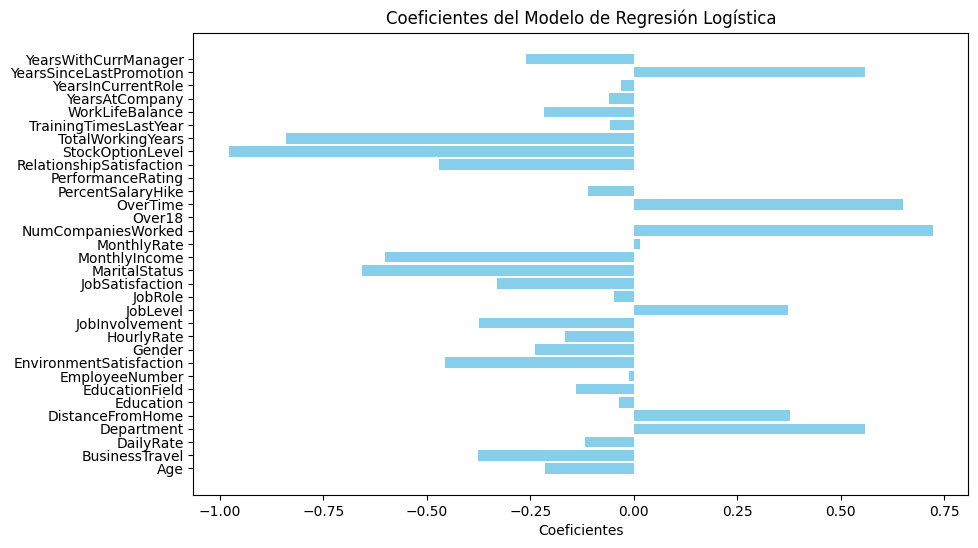

In [241]:
coeficients = logreg_model_smote.coef_[0]
feature_names = X_trainT.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(coeficients)), coeficients, tick_label=feature_names, color='skyblue')
plt.xlabel('Coeficientes')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.show()

b)
*   ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?


In [242]:
print('Segun la grafica podemos observar que el overtime, el numero de compañias trabajadas, stock options y los años totales de trabajo impactan de gran forma para que el empleado abandone su trabajo')

Segun la grafica podemos observar que el overtime, el numero de compañias trabajadas, stock options y los años totales de trabajo impactan de gran forma para que el empleado abandone su trabajo


c)
*   ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?


In [243]:
print('Podemos observar en el grafico aspectos como el departamento, el años en el rol, el genero entre otros')

Podemos observar en el grafico aspectos como el departamento, el años en el rol, el genero entre otros


d)
*   Compara los resultados con el ejercicio anterior e incluye tus comentarios. En
particular, comenta cuál método te da los mejores factores que tienen mayor
impacto en el problema de rotación de personal.


In [244]:
print('considero que el que da mejores factores es el logreg_model_weighted, creo que los factores que muestran afecta mas en el problema de attrition')

considero que el que da mejores factores es el logreg_model_weighted, creo que los factores que muestran afecta mas en el problema de attrition


18.- Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el
kNN y de los factores de mayor impacto que encontraste en el inciso anterior, utiliza la
clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y
volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el
desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida
previamente con todos los factores. Recuerda evitar el filtrado de información del
conjunto de entrenamiento a los conjuntos de validación y de prueba.


In [245]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model_weighted.fit(X_trainT, y_train)

selector = SelectFromModel(logreg_model_weighted, threshold=None, prefit=True)

X_train_selected= selector.transform(X_trainT)
X_val_selected = selector.transform(X_valT)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


a)
*   ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos
se redujo, así como el porcentaje de reducción de factores.


In [246]:
print(f' El numero final de factores es {len(X_train_selected)}')
print(f' El numero anterior de factores es {len(X_trainT)}')
print(f' El porcentaje de reduccion es {(len(X_train_selected)-len(X_trainT))/len(X_trainT)}')


 El numero final de factores es 1029
 El numero anterior de factores es 1029
 El porcentaje de reduccion es 0.0


b)
*   Despliega la matriz de confusión y el reporte dado por la función
classification_report().

In [247]:
# Ajustar el modelo con las características seleccionadas
logreg_model_selected = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model_selected.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de validación con características seleccionadas
y_pred_selected = logreg_model_selected.predict(X_val_selected)

# Evaluar el rendimiento del modelo en el conjunto de validación
accuracy_selected = accuracy_score(y_val, y_pred_selected)
classification_rep_selected = classification_report(y_val, y_pred_selected)

# Imprimir resultados
print(f'Accuracy en el conjunto de validación con características seleccionadas: {accuracy_selected}')
print('Classification Report en el conjunto de validación con características seleccionadas:')
print(classification_rep_selected)


Accuracy en el conjunto de validación con características seleccionadas: 0.7363636363636363
Classification Report en el conjunto de validación con características seleccionadas:
              precision    recall  f1-score   support

          No       0.93      0.74      0.83       185
         Yes       0.34      0.71      0.46        35

    accuracy                           0.74       220
   macro avg       0.64      0.73      0.64       220
weighted avg       0.84      0.74      0.77       220



**PARTE 6: Modelo final y conclusiones**

19.- Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los
siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el
problema de rotación de personal a partir de los datos históricos iniciales.



a)
*   Forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de
entrenamiento y validación que hayas obtenido hasta ahora.

In [248]:

X_train_final = pd.concat([X_trainT, X_valT], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

print(X_train_final.shape, y_train_final.shape)

(1249, 32) (1249,)



b)
*   Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta
ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor
modelo.


In [249]:
print('Para el recall')

Para el recall


In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logreg_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model_weighted.fit(X_train_final, y_train_final)

y_pred_weighted = logreg_model_weighted.predict(X_valT)


In [251]:
print('Para la precision')

Para la precision


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear y ajustar el modelo de regresión logística
logreg_model = LogisticRegression(random_state=42)

# Entrenar el modelo
logreg_model.fit(X_train_final, y_train_final)

# Predecir en el conjunto de prueba
y_pred = logreg_model.predict(X_valT)

c)
*   Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el
conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo.
Para ello:
*   Despliega la exactitud (accuracy) del conjunto de entrenamiento y del
conjunto de Prueba para verificar que no esté sub o sobre entrenado.
*   Despliega la matriz de confusión y el reporte dado por la función
classification_report() del conjunto de Prueba.
*    Incluye las conclusiones finales de la actividad. En particular interpreta y
explica con base al problema de rotación de personal, los resultados
obtenidos para las métricas “precision”, “recall” y “f1-score”.

In [253]:
accuracy_weighted = accuracy_score(y_val, y_pred_weighted)
print(f'Accuracy en el conjunto de validación con pesos de clase: {accuracy_weighted}')

classification_rep_weighted = classification_report(y_val, y_pred_weighted)
print('Classification Report en el conjunto de validación con pesos de clase:')
print(classification_rep_weighted)

Accuracy en el conjunto de validación con pesos de clase: 0.7681818181818182
Classification Report en el conjunto de validación con pesos de clase:
              precision    recall  f1-score   support

          No       0.95      0.77      0.85       185
         Yes       0.39      0.77      0.51        35

    accuracy                           0.77       220
   macro avg       0.67      0.77      0.68       220
weighted avg       0.86      0.77      0.79       220



In [254]:
accuracy_weighted = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validación con pesos de clase: {accuracy_weighted}')

classification_rep_weighted = classification_report(y_val, y_pred)
print('Classification Report en el conjunto de validación con pesos de clase:')
print(classification_rep_weighted)

Accuracy en el conjunto de validación con pesos de clase: 0.8727272727272727
Classification Report en el conjunto de validación con pesos de clase:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       185
         Yes       0.82      0.26      0.39        35

    accuracy                           0.87       220
   macro avg       0.85      0.62      0.66       220
weighted avg       0.87      0.87      0.84       220

